In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image, ImageFile
import tensorflow as tf
import json
import glob
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import gradio as gr
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [6]:
src_location="C:\\Users\\harsh\\Downloads\\Soteria-main\\Soteria-main\\archive\\tier3\\images\\"
files=os.listdir(src_location)
print("Number of image files is",len(files))

pre=[]

post=[]
for f in files:
    if "pre" in f:
        pre.append(f)
    elif "post" in f:
        post.append(f)
    else:
        print("Bad File")
        
print("Count of pre-disaster image = ",len(pre),"Count of post-disaster image = ",len(post),
      "Total images",len(pre)+len(post))        

Number of image files is 0
Count of pre-disaster image =  0 Count of post-disaster image =  0 Total images 0


In [7]:
test_percent=0.25

count_test_pre=int(test_percent*len(pre))
count_test_post=int(test_percent*len(post))

count_train_pre=len(pre)-count_test_pre
count_train_post=len(post)-count_test_post

pre_test=random.sample(pre,count_test_pre)
pre_train=[]
for f in pre:
    if f not in pre_test:
        pre_train.append(f)
        
post_test=random.sample(post,count_test_post)
post_train=[]
for f in post:
    if f not in post_test:
        post_train.append(f)
                
print("Count pre images in train =",len(pre_train),"and test",len(pre_test))
print("Count post images in train =",len(post_train),"and test",len(post_test))

Count pre images in train = 0 and test 0
Count post images in train = 0 and test 0


In [8]:
import os
if not os.path.isdir("data"):
    os.mkdir("data")
if not os.path.isdir("data/arranged"):
    os.mkdir("data/arranged")

if not os.path.isdir("data/arranged/train"):
    os.mkdir("data/arranged/train")
    
    
if not os.path.isdir("data/arranged/test"):
    os.mkdir("data/arranged/test")
    


In [9]:
import shutil
for f in pre_train:
    source="C:/Users/harsh/Downloads/archive/tier3/images/"+f
    dest="data/arranged/train/"+f
    shutil.copy(source,dest)

for f in post_train:
    source="C:/Users/harsh/Downloads/archive/tier3/images/"+f
    dest="data/arranged/train/"+f
    shutil.copy(source,dest)

    
for f in pre_test:
    source="C:/Users/harsh/Downloads/archive/tier3/images/"+f
    dest="data/arranged/test/"+f
    shutil.copy(source,dest)

for f in post_test:
    source="C:/Users/harsh/Downloads/archive/tier3/images/"+f
    dest="data/arranged/test/"+f
    shutil.copy(source,dest)


In [11]:
import pathlib
dataset_path = "./data/arranged/"
train_data_dir = pathlib.Path(dataset_path+"train")
test_data_dir = pathlib.Path(dataset_path+"test")

train_files = glob.glob(r""+dataset_path+"/train/*.png")
print(len(train_files))
train_files = random.sample(train_files, 1000)


train_datasize = len(train_files)
print("training data:", len(train_files))

test_files = glob.glob(r""+dataset_path+"/test/*.png")
test_files = random.sample(test_files, 500)
test_datasize = len(test_files)
print("test data:", len(test_files))

11954
training data: 1000
test data: 500


In [12]:
images = list(train_data_dir.glob('*'))
random_image = random.choice(images)
im = PIL.Image.open(str(random_image))

width, height = im.size
print(width)
print(height)
im.resize((300, 300)).show()

1024
1024


In [2]:
img_height = 1024
img_width = 1024
class_names = np.array(sorted(['disaster happened', 'no disaster happened']))
print(class_names)

['disaster happened' 'no disaster happened']


In [14]:
def get_label(file_path, type):
    parts = file_path.split(os.path.sep)
    print(parts)
    
    if "pre" in parts[1]:
      damage = 'no disaster happened'
    else: 
      damage = 'disaster happened'

    label = damage == class_names
    one_hot = np.zeros(len(class_names), dtype=np.uint8)
    one_hot[label] = 1

    return one_hot


def get_label_from_one_hot(array):
    return class_names[np.where(array == 1)]

In [15]:
print(train_datasize)
train_X = np.zeros((train_datasize, img_height, img_width, 3), dtype=np.uint8)
train_Y = np.zeros((train_datasize, len(class_names)), dtype=np.uint8)
print(len(train_X))
print(len(train_Y))

for i in range(len(train_files)):
    
    img= PIL.Image.open(train_files[i])
    train_X[i] = np.array(img)
    print(i)
    train_Y[i] = get_label(train_files[i], "train")
print("train")
print(train_X.shape)
print(train_Y.shape)

test_X = np.zeros((test_datasize, img_height, img_width, 3), dtype=np.uint8)
test_Y = np.zeros((test_datasize, len(class_names)), dtype=np.uint8)

for i in range(len(test_files)):
    img= PIL.Image.open(test_files[i])
    test_X[i] = np.array(img)
    test_Y[i] = get_label(test_files[i], "test")
print("test")
print(test_X.shape)
print(test_Y.shape)

1000
1000
1000
0
['./data/arranged//train', 'joplin-tornado_00000056_pre_disaster.png']
1
['./data/arranged//train', 'tuscaloosa-tornado_00000329_pre_disaster.png']
2
['./data/arranged//train', 'pinery-bushfire_00000756_pre_disaster.png']
3
['./data/arranged//train', 'woolsey-fire_00000501_post_disaster.png']
4
['./data/arranged//train', 'nepal-flooding_00000086_post_disaster.png']
5
['./data/arranged//train', 'portugal-wildfire_00001265_pre_disaster.png']
6
['./data/arranged//train', 'pinery-bushfire_00000355_post_disaster.png']
7
['./data/arranged//train', 'portugal-wildfire_00000148_post_disaster.png']
8
['./data/arranged//train', 'portugal-wildfire_00001023_pre_disaster.png']
9
['./data/arranged//train', 'portugal-wildfire_00000840_post_disaster.png']
10
['./data/arranged//train', 'pinery-bushfire_00001078_pre_disaster.png']
11
['./data/arranged//train', 'portugal-wildfire_00000535_post_disaster.png']
12
['./data/arranged//train', 'joplin-tornado_00000032_post_disaster.png']
13
['.

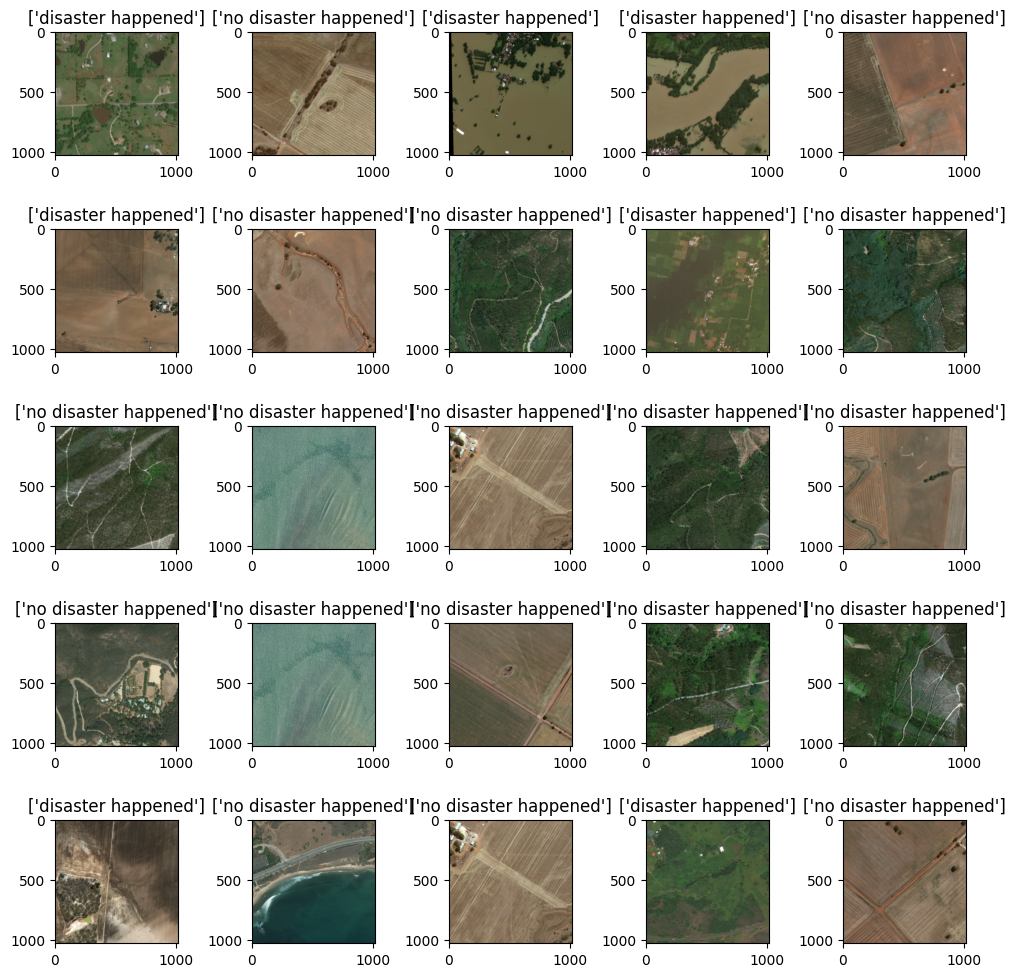

In [16]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)    
    choice = random.randint(0, train_datasize-1)
    plt.title(get_label_from_one_hot(train_Y[choice]))
    plt.imshow(train_X[choice])

plt.tight_layout()
plt.show()

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax"),
])

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 1024, 1024, 3)     0         
                                                                 
 conv2d (Conv2D)             (None, 1024, 1024, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      1

In [19]:
epochs = 7
batch_size = 5
history = model.fit(
  train_X,
  train_Y,
  validation_data=(test_X, test_Y),
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/7
200/200 [==============================] - 645s 3s/step - loss: 1.0310 - accuracy: 0.5260 - val_loss: 0.6930 - val_accuracy: 0.4960
Epoch 2/7
200/200 [==============================] - 1549s 8s/step - loss: 0.6948 - accuracy: 0.5420 - val_loss: 0.7137 - val_accuracy: 0.4960
Epoch 3/7
200/200 [==============================] - 562s 3s/step - loss: 0.6660 - accuracy: 0.5790 - val_loss: 0.7375 - val_accuracy: 0.4680
Epoch 4/7
200/200 [==============================] - 765s 4s/step - loss: 0.6113 - accuracy: 0.6610 - val_loss: 0.8595 - val_accuracy: 0.5940
Epoch 5/7
200/200 [==============================] - 1394s 7s/step - loss: 0.4060 - accuracy: 0.8110 - val_loss: 1.1907 - val_accuracy: 0.6000
Epoch 6/7
200/200 [==============================] - 800s 4s/step - loss: 0.2128 - accuracy: 0.9120 - val_loss: 2.2041 - val_accuracy: 0.5540
Epoch 7/7
200/200 [==============================] - 860s 4s/step - loss: 0.1016 - accuracy: 0.9620 - val_loss: 3.1384 - val_accuracy: 0.5680


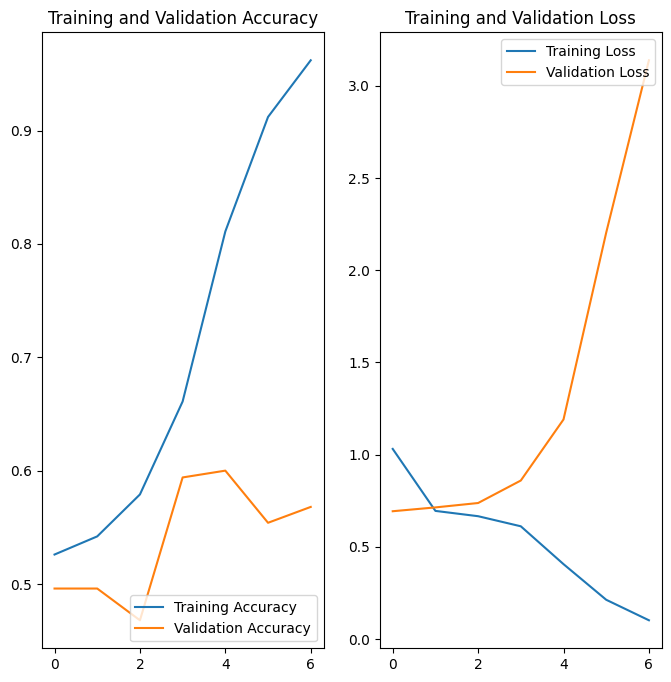

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.save("damage-classification-model")

INFO:tensorflow:Assets written to: damage-classification-model\assets


INFO:tensorflow:Assets written to: damage-classification-model\assets


In [22]:
new_model = tf.keras.models.load_model('damage-classification-model')
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 1024, 1024, 3)     0         
                                                                 
 conv2d (Conv2D)             (None, 1024, 1024, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      1

In [3]:
def damage_classification(img):
    print(img.shape)
    new_model = tf.keras.models.load_model('damage-classification-model')
    image = np.zeros((1, 1024, 1024, 3), dtype=np.uint8)
    image[0] = img
    prediction = new_model.predict(image).tolist()[0]
    print(prediction)
    return {class_names[i]: prediction[i] for i in range(len(class_names))}

iface = gr.Interface(
    fn = damage_classification,
    inputs = gr.inputs.Image(shape=(1024, 1024), image_mode='RGB', invert_colors=False, source="upload", type='numpy'), 
    outputs = gr.outputs.Label(),
    allow_screenshot=False, 
    allow_flagging='never'
)
iface.launch(share=True, show_error=True, inline=True, debug=True)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\de

Running on local URL:  http://127.0.0.1:7860

Could not create share link, please check your internet connection.


(1024, 1024, 3)
1/1 [==============================] - 1s 849ms/step
[1.1166298108378214e-08, 1.0]
(1024, 1024, 3)
1/1 [==============================] - 0s 478ms/step
[3.4030018494529446e-17, 1.0]
(1024, 1024, 3)
1/1 [==============================] - 0s 458ms/step
[0.9769091010093689, 0.023090941831469536]
(1024, 1024, 3)
1/1 [==============================] - 1s 526ms/step
[0.9999996423721313, 4.0882741814129986e-07]
(1024, 1024, 3)
1/1 [==============================] - 0s 472ms/step
[0.011089816689491272, 0.9889101982116699]
(1024, 1024, 3)
1/1 [==============================] - 0s 462ms/step
[1.0, 1.2731189747362852e-16]
Keyboard interruption in main thread... closing server.
